#### Local Sensitivity Analysis

Parameter sensitivity quantifies the model output variation due to varying model parameters. Biotechnological processes are naturally quite sensitive process since the cell growth and the outcome in general are strongly influenced by input and parameter changes.

Parameters that are less sensitive contribute only little to the model output and are consequently not as important (model reduction) and their determination is difficult with output measurements (identifiability).

Book from Kager

Local Sensitivity $S_{i,p}= \frac{\partial c_i}{\partial \theta_p} \simeq \frac{\Delta c_i}{\Delta \theta_p}$

Output sensitivities vary over time, resulting in the time dependent sensitivity matrix S

$$ S=\begin{bmatrix}

\frac{\partial c_i(t_1)}{\partial \theta_1} & \frac{\partial c_i(t_1)}{\partial \theta_2} & ... & \frac{\partial c_i(t_1)}{\partial \theta_r} \\
\frac{\partial c_i(t_2)}{\partial \theta_1} & \frac{\partial c_i(t_2)}{\partial \theta_2} & ... & \frac{\partial c_i(t_2)}{\partial \theta_r} \\
... & ... & ... & ... \\
\frac{\partial c_i(t_d)}{\partial \theta_1} & \frac{\partial c_i(t_d)}{\partial \theta_2} & ... & \frac{\partial c_i(t_d)}{\partial \theta_r}

\end{bmatrix}
$$

(d x r) matrix for one variable where d is the number of time steps (20 samples) and r the number of parameters (Yxs, qs_max, Ks, m_s, lag).

In our case we have n=2 variables: X and S and therefore 2 matrices.

Usually 1-2 % perturbation

$\delta^{msqr}_p= \sqrt{\frac{1}{n}\Sigma^{n}_{i=1} \space \bar{S}_{i,p}} \space \space$ where $\space \space \bar{S}_{i,p}=\frac{\partial c_i}{\partial \theta_p} \cdot \theta_p$

where n is the number of samples

#### Code

In [1]:
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
from D_model import model

pd.options.mode.chained_assignment = None  # Suppress the warning

In [2]:
# Load parameters from YAML file
with open('config/parameters.yml', 'r') as file:
    param = yaml.safe_load(file)

In [3]:
# Reference parameter and model
parameter = param['set_parameter']
time, biomass_ref, substrate_ref = model(parameter)

In [4]:
# Deflection by 1%
perc = 0.01

In [5]:
# Creating dataframes to save the reference model, the deviation for each parameter variation
S_biomass = pd.DataFrame()
S_biomass['time'] = time

S_susbtrate = pd.DataFrame()
S_susbtrate['time'] = time

In [6]:
name_p = ['Yxs', 'qs_max', 'Ks', 'm_s', 'lag']
ranking_X = []
ranking_S = []

for p in range(len(parameter)): #
    copy_p = parameter.copy()
    new_p = copy_p[p] + (copy_p[p]*perc)
    copy_p[p] = round(new_p, 4)
    print(copy_p)
    time_mod, biomass_mod, substrate_mod = model(copy_p)

    biomass_diff = (biomass_mod - biomass_ref) / (copy_p[p] -parameter[p]) * parameter[p]
    S_biomass[name_p[p]] = biomass_diff
    delta_X_Yxs = np.sqrt(abs(biomass_diff).sum()/len(biomass_diff))
    ranking_X.append(round(delta_X_Yxs, 2))

    substrate_diff = (substrate_mod - substrate_ref) / (copy_p[p] -parameter[p]) * parameter[p]
    S_susbtrate[name_p[p]] = substrate_diff
    delta_S_Yxs = np.sqrt(abs(substrate_diff).sum()/len(substrate_diff))
    ranking_S.append(round(delta_S_Yxs, 2))

print(ranking_X)
print(ranking_S)

[0.4643, 1.1255, 0.6814, 0.0094, 0.1913]
[0.4597, 1.1368, 0.6814, 0.0094, 0.1913]
[0.4597, 1.1255, 0.6882, 0.0094, 0.1913]
[0.4597, 1.1255, 0.6814, 0.0095, 0.1913]
[0.4597, 1.1255, 0.6814, 0.0094, 0.1932]
[2.43, 2.07, 0.45, 0.2, 2.85]
[2.58, 2.7, 0.56, 0.94, 3.71]


<BarContainer object of 5 artists>

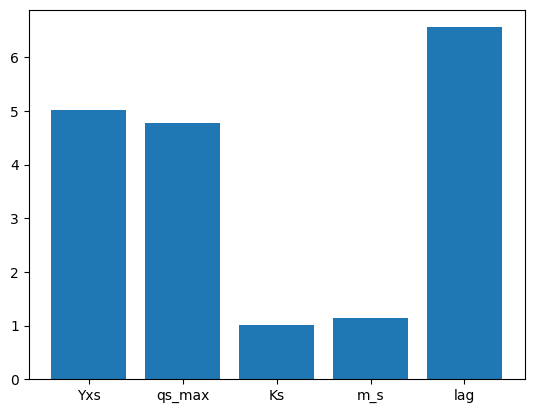

In [7]:
total_ranking = [x + y for x, y in zip(ranking_X, ranking_S)]
plt.bar(name_p, total_ranking)

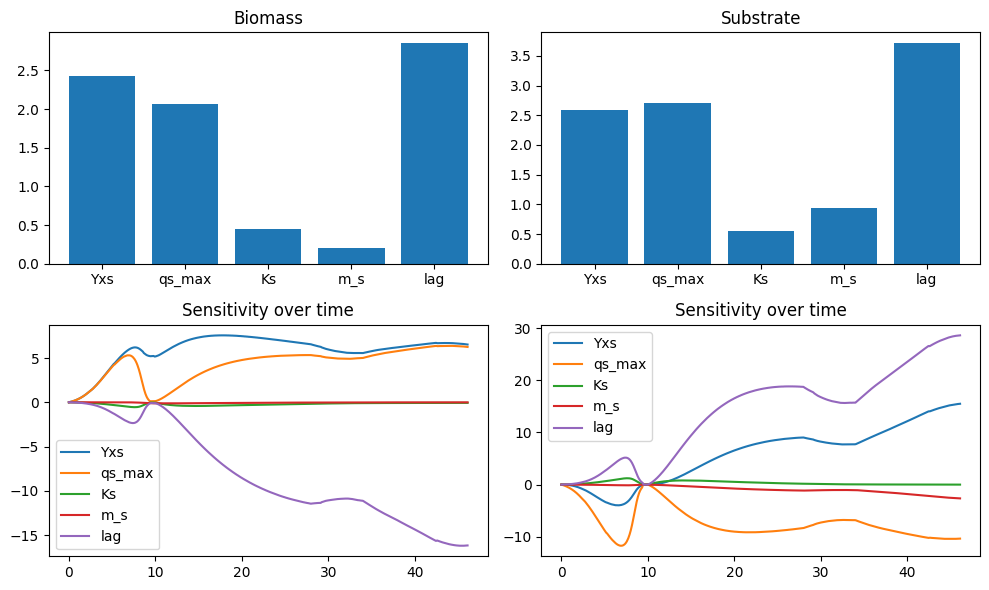

In [8]:
fig, ax = plt.subplots(2,2, figsize=(10,6))
ax[0,0].bar(name_p, ranking_X)
ax[0,0].set_title('Biomass')
ax[0,1].bar(name_p, ranking_S)
ax[0,1].set_title('Substrate')

cols_to_plot_X = S_biomass.drop('time', axis=1)
ax[1,0].plot(S_biomass['time'], cols_to_plot_X)
ax[1,0].set_title('Sensitivity over time')
ax[1,0].legend(cols_to_plot_X.columns)

cols_to_plot_S = S_susbtrate.drop('time', axis=1)
ax[1,1].plot(S_susbtrate['time'], cols_to_plot_S)
ax[1,1].set_title('Sensitivity over time')
ax[1,1].legend(cols_to_plot_S.columns)
plt.tight_layout()